In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [52]:
pwd = os.getcwd()
filepath = pwd + "\\skater_stats.csv"
data = pd.read_csv(filepath,encoding='latin-1')

C:\Users\krist\AppData\Local\Temp\ipykernel_9440\4019381976.py:3: DtypeWarning: Columns (8,9,11,29,48,49,55,56,59,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath,encoding='latin-1')


In [53]:
# Shape of the current dataset.
data.shape

(71251, 90)

In [54]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [55]:
# Displaying top 5 results by index.
data.head()

,Season,Game_Type,Player_ID,Player_Name,Hof,Age,Team_ID,Team_Name,Team_Bkdwn_Flag,Seas_Sum_Flag,Pos1,Pos2,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,Avg_TOI,BLK,HIT,FOW,FOL,FO_Pct,esCF,esCA,esCF_Pct,esRelCF_Pct,esFF,esFA,esFF_Pct,esRelFF_Pct,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TOI_per60,esTOI_per60,TK,GV,xPlusMinus,TSA,SAThruToNet_Pct,Avg_ShiftLength_perGm,esTOI_perGm,esGF_per60,esGA_per60,ppTOI_perGm,ppRelCF_Pct,ppGF_per60,ppGA_per60,shTOI_perGm,shRelCF_Pct,shGF_per60,shGA_per60,GC,G_perGm,A_perGm,PTS_perGm,GC_perGm,PIM_perGm,S_perGm,adjG,adjA,adjPTS,adjGC,oiTGF,oiPPGF,oiTGA,oiPKGA,xGF,xGA,OPS,DPS,soAtt,soMade,soMiss,soPct
0,1918,REG,adamsja01,Jack Adams,True,23,TRA,Toronto Arenas,False,False,C,NaN,8.0,0,0,0,NaN,31.0,-0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,3.88,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,0.2,NaN,NaN,NaN,NaN
1,1918,REG,bellbi01,Billy Bell,False,26,TOT,Total,False,True,F,NaN,9.0,1,0,1,NaN,6.0,-0.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.11,0.00,0.11,0.10,0.67,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.3,NaN,NaN,NaN,NaN
2,1918,REG,bellbi01,Billy Bell,False,26,MTL,Montreal Canadiens,True,False,F,NaN,7.0,0,0,0,NaN,6.0,-0.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.86,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.3,NaN,NaN,NaN,NaN
3,1918,REG,bellbi01,Billy Bell,False,26,MTW,Montreal Wanderers,True,False,F,NaN,2.0,1,0,1,NaN,0.0,0.1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.50,0.00,0.50,0.45,0.00,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.1,NaN,NaN,NaN,NaN
4,1918,REG,berlilo01,Louis Berlinguette,False,30,MTL,Montreal Canadiens,False,False,LW,NaN,20.0,2,1,3,NaN,12.0,-0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.10,0.05,0.15,0.11,0.60,NaN,2.0,5.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.3,0.8,NaN,NaN,NaN,NaN


In [56]:
# In this analysis I´m mostly interested in regular season games played between seasons 2015-2022 with minimum 20 games played per player.
data = data[(data["Season"] >= 2015) & (data["Game_Type"] == "REG")]

In [57]:
data = data.reset_index(drop=True)

In [58]:
data.head()

,Season,Game_Type,Player_ID,Player_Name,Hof,Age,Team_ID,Team_Name,Team_Bkdwn_Flag,Seas_Sum_Flag,Pos1,Pos2,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,Avg_TOI,BLK,HIT,FOW,FOL,FO_Pct,esCF,esCA,esCF_Pct,esRelCF_Pct,esFF,esFA,esFF_Pct,esRelFF_Pct,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TOI_per60,esTOI_per60,TK,GV,xPlusMinus,TSA,SAThruToNet_Pct,Avg_ShiftLength_perGm,esTOI_perGm,esGF_per60,esGA_per60,ppTOI_perGm,ppRelCF_Pct,ppGF_per60,ppGA_per60,shTOI_perGm,shRelCF_Pct,shGF_per60,shGA_per60,GC,G_perGm,A_perGm,PTS_perGm,GC_perGm,PIM_perGm,S_perGm,adjG,adjA,adjPTS,adjGC,oiTGF,oiPPGF,oiTGA,oiPKGA,xGF,xGA,OPS,DPS,soAtt,soMade,soMiss,soPct
0,2015,REG,abdelju01,Justin Abdelkader,False,27,DET,Detroit Red Wings,False,False,LW,NaN,71.0,23,21,44,3.0,72.0,5.6,15.0,8.0,0.0,5.0,15.0,6.0,0.0,154.0,14.9,1272.0,17:55,28.0,153.0,7.0,8.0,46.7,909.0,704.0,56.4,4.0,668.0,540.0,55.3,4.1,9.7,90.5,100.2,63.6,36.4,17:55,14:10,16.0,29.0,9.7,237.0,65.0,0:38,14:09,2.9,2.3,2:48,-2.2,9.7,2.1,0:56,1.9,0.0,4.5,18.0,0.32,0.30,0.62,0.25,1.01,2.17,26.0,23.0,49.0,20.0,80.0,32.0,50.0,5.0,39.1,29.3,4.0,1.6,0.0,NaN,NaN,NaN
1,2015,REG,actonwi01,Will Acton,False,27,EDM,Edmonton Oilers,False,False,C,NaN,3.0,0,0,0,-2.0,5.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,32.0,10:43,3.0,3.0,4.0,4.0,50.0,21.0,26.0,44.7,-9.8,16.0,14.0,53.3,1.9,11.1,70.0,81.1,10.5,89.5,10:43,9:21,2.0,0.0,-0.2,3.0,66.7,0:46,9:20,2.1,6.4,0:01,NaN,0.0,0.0,1:21,-2.9,0.0,14.8,0.0,0.00,0.00,0.00,0.00,1.67,0.67,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.5,0.7,-0.1,0.0,0.0,NaN,NaN,NaN
2,2015,REG,adamlu01,Luke Adam,False,24,CBJ,Columbus Blue Jackets,False,False,C,NaN,3.0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,19.0,6:27,0.0,2.0,0.0,0.0,NaN,11.0,9.0,55.0,8.7,5.0,8.0,38.5,-8.0,0.0,100.0,100.0,30.0,70.0,6:27,6:21,0.0,0.0,-0.7,1.0,0.0,0:33,6:26,0.0,0.0,0:00,NaN,NaN,NaN,0:00,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,1.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.8,-0.1,0.0,0.0,NaN,NaN,NaN
3,2015,REG,adamscr01,Craig Adams,False,37,PIT,Pittsburgh Penguins,False,False,RW,NaN,70.0,1,6,7,-1.0,44.0,-0.3,1.0,0.0,0.0,1.0,5.0,0.0,1.0,51.0,2.0,682.0,9:45,29.0,183.0,17.0,23.0,42.5,363.0,396.0,47.8,-6.3,268.0,292.0,47.9,-6.6,5.6,93.7,99.2,50.0,50.0,9:45,7:10,6.0,7.0,-3.4,76.0,67.1,0:28,7:09,1.3,1.6,0:02,11.8,0.0,0.0,2:33,-1.4,0.7,5.0,2.0,0.01,0.09,0.10,0.03,0.63,0.73,1.0,7.0,8.0,2.0,13.0,0.0,28.0,15.0,14.6,18.0,-1.0,0.8,0.0,NaN,NaN,NaN
4,2015,REG,agozzan01,Andrew Agozzino,False,24,COL,Colorado Avalanche,False,False,LW,NaN,1.0,0,1,1,1.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,9:45,0.0,1.0,0.0,2.0,0.0,8.0,14.0,36.4,-11.8,7.0,9.0,43.8,-4.4,20.0,100.0,120.0,50.0,50.0,9:45,9:45,1.0,0.0,0.0,2.0,50.0,0:33,9:45,6.2,0.0,0:00,NaN,NaN,NaN,0:00,NaN,NaN,NaN,0.0,0.00,1.00,1.00,0.27,0.00,1.00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.4,0.3,0.1,0.1,0.0,NaN,NaN,NaN


In [59]:
# Displaying columns of the dataset.
data.columns

Index(['Season', 'Game_Type', 'Player_ID', 'Player_Name', 'Hof', 'Age',
       'Team_ID', 'Team_Name', 'Team_Bkdwn_Flag', 'Seas_Sum_Flag', 'Pos1',
       'Pos2', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM', 'PS', 'esG', 'ppG',
       'shG', 'GWG', 'esA', 'ppA', 'shA', 'S', 'S_Pct', 'TOI', 'Avg_TOI',
       'BLK', 'HIT', 'FOW', 'FOL', 'FO_Pct', 'esCF', 'esCA', 'esCF_Pct',
       'esRelCF_Pct', 'esFF', 'esFA', 'esFF_Pct', 'esRelFF_Pct', 'oiSH_Pct',
       'oiSV_Pct', 'PDO', 'oZS_Pct', 'dZS_Pct', 'TOI_per60', 'esTOI_per60',
       'TK', 'GV', 'xPlusMinus', 'TSA', 'SAThruToNet_Pct',
       'Avg_ShiftLength_perGm', 'esTOI_perGm', 'esGF_per60', 'esGA_per60',
       'ppTOI_perGm', 'ppRelCF_Pct', 'ppGF_per60', 'ppGA_per60', 'shTOI_perGm',
       'shRelCF_Pct', 'shGF_per60', 'shGA_per60', 'GC', 'G_perGm', 'A_perGm',
       'PTS_perGm', 'GC_perGm', 'PIM_perGm', 'S_perGm', 'adjG', 'adjA',
       'adjPTS', 'adjGC', 'oiTGF', 'oiPPGF', 'oiTGA', 'oiPKGA', 'xGF', 'xGA',
       'OPS', 'DPS', 'soAtt', 'so

In [60]:
# Sorting the columns I´m interested in.
data = data[['Season','Player_Name','Age',
       'Team_ID', 'Team_Name','Pos1','GP', 'G', 'A', 'PTS', 'PIM','PS', 'PlusMinus', 'esG', 'ppG',
       'shG', 'GWG', 'esA', 'ppA', 'shA', 'S', 'TOI', 'Avg_TOI','BLK', 'HIT',  'FOW', 'FOL','xGF', 'xGA',]]

In [61]:
# Changing the name of column Pos1 to Pos (as Position).
data.rename(columns={"Pos1":"Pos"}, inplace=True)

In [62]:
# Checking for null values.
data.isna().sum()

Season          0
Player_Name     0
Age             0
Team_ID         0
Team_Name      35
Pos             0
GP              0
G               0
A               0
PTS             0
PIM             0
PS              0
PlusMinus       0
esG             0
ppG             0
shG             0
GWG             0
esA             0
ppA             0
shA             0
S               0
TOI             0
Avg_TOI         0
BLK             3
HIT             0
FOW             3
FOL             3
xGF             3
xGA             3
dtype: int64

In [63]:
# Checking which Team_Name has null values.
data["Team_ID"][data["Team_Name"].isna()].unique()

array(['SEA'], dtype=object)

In [64]:
# Assigning Team_Name based on Team_ID.
data["Team_Name"].fillna("Seattle Kraken", inplace=True)

In [65]:
print("Dataset shape = {}\n".format(data.shape))
data.info()

Dataset shape = (8419, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8419 entries, 0 to 8418
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       8419 non-null   int64  
 1   Player_Name  8419 non-null   object 
 2   Age          8419 non-null   int64  
 3   Team_ID      8419 non-null   object 
 4   Team_Name    8419 non-null   object 
 5   Pos          8419 non-null   object 
 6   GP           8419 non-null   float64
 7   G            8419 non-null   int64  
 8   A            8419 non-null   int64  
 9   PTS          8419 non-null   int64  
 10  PIM          8419 non-null   float64
 11  PS           8419 non-null   float64
 12  PlusMinus    8419 non-null   float64
 13  esG          8419 non-null   float64
 14  ppG          8419 non-null   float64
 15  shG          8419 non-null   float64
 16  GWG          8419 non-null   float64
 17  esA          8419 non-null   float64
 18  ppA          8419 no

In [66]:
# Basic descriptive statistics of the numeric columns.
data.describe()

,Season,Age,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,xGF,xGA
count,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8419.000000,8416.000000,8419.000000,8416.000000,8416.000000,8416.000000,8416.000000
mean,2018.548046,26.389001,44.118898,6.908897,11.613493,18.522390,21.211070,2.181233,-0.625134,5.326048,1.391377,0.191472,1.088490,8.766124,2.646870,0.200499,74.680366,722.694857,34.146863,55.696282,70.945461,71.021269,24.495307,24.495722
std,2.313598,4.240470,27.870811,8.418767,12.613007,19.845371,21.933223,2.621983,9.673298,6.168286,2.674408,0.573981,1.689523,8.612017,4.763461,0.530106,66.590814,542.078857,36.902812,52.289425,164.528039,154.059963,19.151930,18.170895
min,2015.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,-47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,23.000000,16.000000,1.000000,2.000000,3.000000,4.000000,0.100000,-5.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,17.000000,203.000000,7.000000,15.000000,0.000000,0.000000,6.400000,7.100000
50%,2019.000000,26.000000,49.000000,4.000000,7.000000,12.000000,16.000000,1.200000,-1.000000,3.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,60.000000,689.000000,23.000000,42.000000,1.000000,3.000000,22.000000,23.300000
75%,2021.000000,29.000000,70.000000,10.000000,17.000000,28.000000,31.000000,3.500000,3.000000,8.000000,2.000000,0.000000,2.000000,14.000000,3.000000,0.000000,115.000000,1165.000000,45.000000,81.000000,32.000000,39.000000,39.300000,38.800000
max,2022.000000,45.000000,84.000000,60.000000,87.000000,128.000000,238.000000,15.300000,64.000000,44.000000,26.000000,7.000000,12.000000,56.000000,34.000000,6.000000,398.000000,2378.000000,283.000000,382.000000,1273.000000,935.000000,86.800000,82.200000


In [67]:
# Checking unique values in column Games played. Regular season in NHL has 82 games, this dataset has players that played more than that.
data["GP"].unique()

array([71.,  3., 70.,  1., 13., 11.,  6.,  5.,  4., 82., 68., 18., 12.,
       52., 77., 36., 27., 10.,  7., 78.,  2., 31., 80., 15., 14., 47.,
       37., 62., 64., 65., 49., 81., 73., 59., 56., 39., 17., 67.,  9.,
       60., 72., 45., 41., 21., 53., 75., 63., 51., 38., 29., 69., 30.,
        8., 44., 57., 20., 33., 19., 16., 40., 76., 61., 58., 74., 24.,
       43., 54., 55., 50., 32., 23., 35., 79., 42., 26., 66., 34., 25.,
       48., 46., 22., 28., 84., 83.])

In [68]:
# Looking for players that played more than 82 games, the problem was with players that were traded during the regular season and their stats from multiple teams were summed together in a new row.
data[data["GP"] > 82]

,Season,Player_Name,Age,Team_ID,Team_Name,Pos,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,Avg_TOI,BLK,HIT,FOW,FOL,xGF,xGA
1031,2015,Keith Yandle,28,TOT,Total,D,84.0,6,46,52,40.0,6.6,-26.0,4.0,2.0,0.0,2.0,19.0,27.0,0.0,232.0,1925.0,22:55,101.0,53.0,0.0,0.0,59.2,70.1
1038,2015,Marek Zidlicky,37,TOT,Total,D,84.0,7,27,34,56.0,6.0,-9.0,1.0,6.0,0.0,1.0,13.0,14.0,0.0,130.0,1760.0,20:57,92.0,95.0,0.0,1.0,54.1,60.8
1636,2016,Jamie McGinn,27,TOT,Total,LW,84.0,22,17,39,33.0,5.0,-7.0,13.0,9.0,0.0,5.0,14.0,3.0,0.0,156.0,1201.0,14:18,27.0,164.0,4.0,3.0,34.7,33.9
1930,2016,Eric Staal,31,TOT,Total,C,83.0,13,26,39,34.0,3.4,-3.0,12.0,1.0,0.0,0.0,20.0,6.0,0.0,199.0,1540.0,18:33,33.0,74.0,446.0,396.0,58.7,46.5
4436,2019,Kevin Fiala,22,TOT,Total,LW,83.0,13,26,39,36.0,2.4,-23.0,11.0,2.0,0.0,2.0,17.0,9.0,0.0,174.0,1298.0,15:38,20.0,42.0,3.0,5.0,49.6,52.2
4551,2019,Ryan Hartman,24,TOT,Total,RW,83.0,12,14,26,74.0,2.1,1.0,12.0,0.0,0.0,2.0,14.0,0.0,0.0,145.0,1089.0,13:07,39.0,107.0,4.0,12.0,41.6,48.7
4919,2019,Marcus Pettersson,22,TOT,Total,D,84.0,2,23,25,66.0,5.0,17.0,1.0,1.0,0.0,0.0,18.0,4.0,1.0,87.0,1401.0,16:41,108.0,101.0,1.0,0.0,52.6,48.0


In [69]:
# Team_ID with value TOT means Season Total for players that were traded during the season. I want to delete those rows as we have their separate stats in other rows for that particular season.
data = data[data["Team_ID"] != "TOT"]

In [70]:
data.fillna(0,inplace=True)

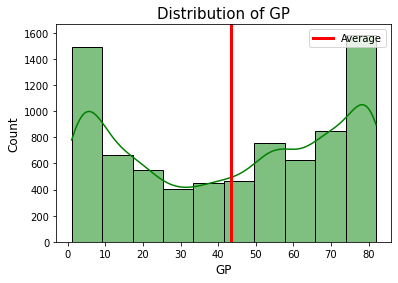

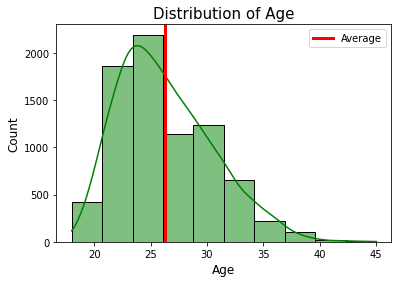

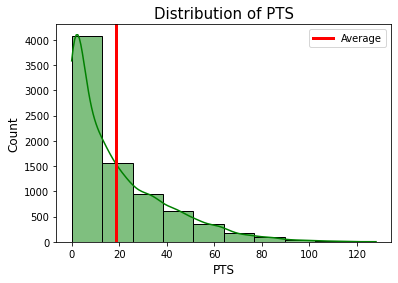

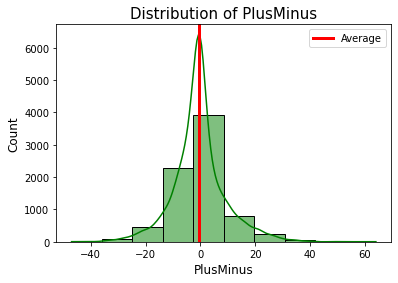

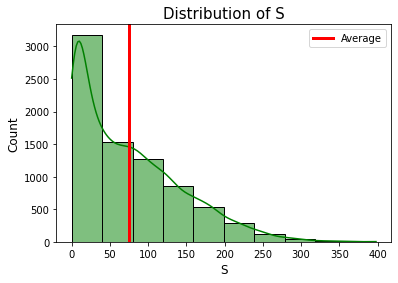

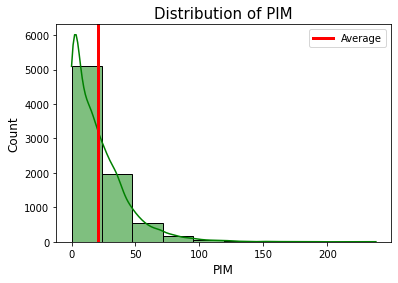

In [71]:
# Looking at the distribution of the dataset.
xd = ["GP","Age","PTS","PlusMinus","S","PIM"]
for i in xd:
    sns.histplot(x=i, data=data, color="g", kde=True, bins=10)
    plt.title("Distribution of " + i, fontsize=15)
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.axvline(data[i].mean(), linewidth=3, c="r", label="Average")
    plt.legend()
    plt.show()

In [72]:
# Quick stats of the last 7 seasons.
print("Most goals scored during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"G":"sum"}).sort_values(by="G", ascending=False).head(1), "\n")
print("Most game-winning goals scored during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"GWG":"sum"}).sort_values(by="GWG", ascending=False).head(1), "\n")
print("Most assists during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"A":"sum"}).sort_values(by="A", ascending=False).head(1), "\n")
print("Most points during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"PTS":"sum"}).sort_values(by="PTS", ascending=False).head(1), "\n")
print("Most shots during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"S":"sum"}).sort_values(by="S", ascending=False).head(1), "\n")
print("Most hits during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"HIT":"sum"}).sort_values(by="HIT", ascending=False).head(1), "\n")
print("Most penalty minutes during the last 7 seasons: ", data.groupby(["Player_Name",]).agg({"PIM":"sum"}).sort_values(by="PIM", ascending=False).head(1), "\n")
print("Most blocked shots during the last 7 seasons : ", data.groupby(["Player_Name",]).agg({"BLK":"sum"}).sort_values(by="BLK", ascending=False).head(1), "\n")
print("Most minutes played during the last 7 seasons : ", data.groupby(["Player_Name"]).agg({"TOI":"sum"}).sort_values(by="TOI", ascending=False).head(1), "\n")
print("Most faceoffs won during the last 7 seasons : ", data.groupby(["Player_Name"]).agg({"FOW":"sum"}).sort_values(by="FOW", ascending=False).head(1), "\n")
print("Oldest player to play during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"Age":"max"}).sort_values(by="Age", ascending=False).head(1), "\n")
print("Most games played during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"GP":"sum"}).sort_values(by="GP", ascending=False).head(1), "\n")
print("Best Plus-Minus player during the last 7 seasons: ", data.groupby(["Player_Name"]).agg({"PlusMinus":"max"}).sort_values(by="PlusMinus", ascending=False).head(1), "\n")


Most goals scored during the last 7 seasons:                   G
Player_Name       
Alex Ovechkin  358 

Most game-winning goals scored during the last 7 seasons:                   GWG
Player_Name         
Connor McDavid  53.0 

Most assists during the last 7 seasons:                    A
Player_Name        
Connor McDavid  458 

Most points during the last 7 seasons:                  PTS
Player_Name        
Connor McDavid  697 

Most shots during the last 7 seasons:                      S
Player_Name          
Alex Ovechkin  2626.0 

Most hits during the last 7 seasons:                  HIT
Player_Name        
Matt Martin  2127.0 

Most penalty minutes during the last 7 seasons:                  PIM
Player_Name        
Tom Wilson   1070.0 

Most blocked shots during the last 7 seasons :                   BLK
Player_Name         
Kris Russell  1358.0 

Most minutes played during the last 7 seasons :                   TOI
Player_Name         
Ryan Suter   15951.0 

Most faceoffs won dur

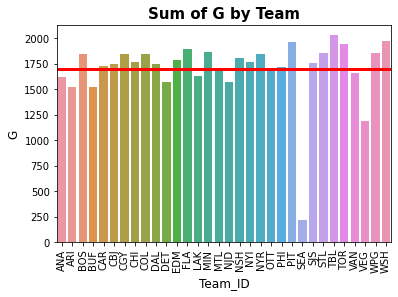

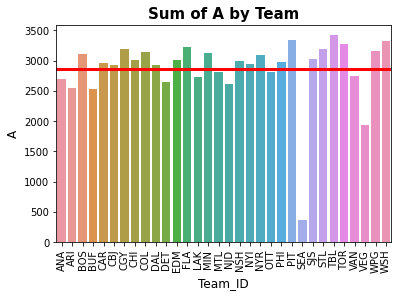

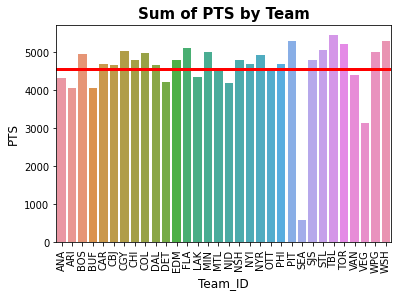

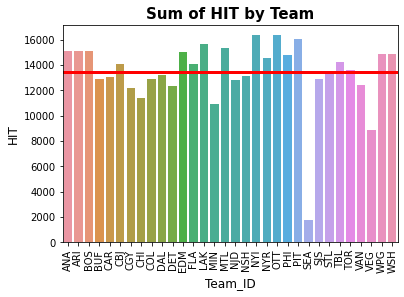

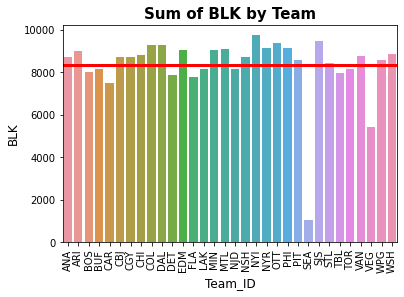

In [73]:
# Sum of Goals, Hits and Penalty minutes per team during the last 7 seasons.
cols = ["G", "A", "PTS", "HIT","BLK"]
for s in cols:
    sns.barplot(x="Team_ID", y=s, data=data.sort_values(by="Team_ID"), estimator=sum, ci=False)
    plt.title("Sum of " + s + " by Team", fontsize=15, fontweight="bold")
    plt.xlabel("Team_ID", fontsize=12)
    plt.ylabel(s, fontsize=12)
    plt.axhline(data[s].sum()/(len(data["Team_ID"].unique())),0,1, c="red", linewidth=3)
    plt.xticks(rotation=90)
    plt.show()

In [74]:
# Top 5/Bottom 5 teams per Goals, Hits and Blocked shots.
cols = ["G","A","PTS","HIT","BLK"]
for s in cols:
    print("Most " + s + " overall:")
    print(data.groupby("Team_ID").agg({s:"sum"}).sort_values(by=s, ascending=False).head(5), "\n")
    print("Least " + s + " overall:")
    print(data.groupby("Team_ID").agg({s:"sum"}).sort_values(by=s, ascending=True).head(5), "\n")

Most G overall:
            G
Team_ID      
TBL      2030
WSH      1970
PIT      1960
TOR      1939
FLA      1897 

Least G overall:
            G
Team_ID      
SEA       213
VEG      1190
ARI      1525
BUF      1526
DET      1568 

Most A overall:
            A
Team_ID      
TBL      3422
PIT      3346
WSH      3329
TOR      3275
FLA      3218 

Least A overall:
            A
Team_ID      
SEA       367
VEG      1942
BUF      2527
ARI      2540
NJD      2612 

Most PTS overall:
          PTS
Team_ID      
TBL      5452
PIT      5306
WSH      5299
TOR      5214
FLA      5115 

Least PTS overall:
          PTS
Team_ID      
SEA       580
VEG      3132
BUF      4053
ARI      4065
NJD      4187 

Most HIT overall:
             HIT
Team_ID         
NYI      16357.0
OTT      16340.0
PIT      16041.0
LAK      15641.0
MTL      15335.0 

Least HIT overall:
             HIT
Team_ID         
SEA       1770.0
VEG       8837.0
MIN      10917.0
CHI      11423.0
CGY      12212.0 

Most BLK overall:


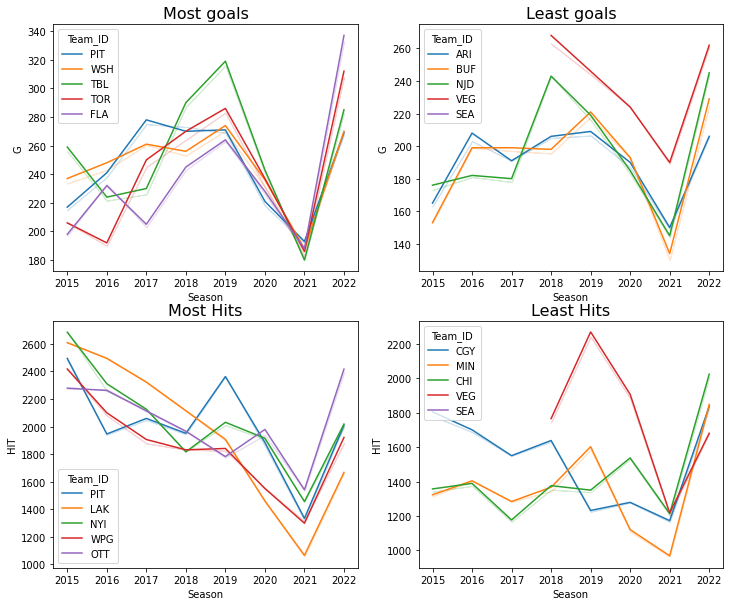

In [75]:
# Displaying some of the achieved stats using subplot.
fig, axes = plt.subplots(2,2, figsize=(12,10))
ax1 = sns.lineplot(x="Season", y="G", data=data[data["Team_ID"].isin(["TBL","WSH","TOR","PIT","FLA"])], hue="Team_ID", ci=False, estimator=sum, ax=axes[0,0])
ax1.set_title("Most goals", fontsize=16)
ax2 = sns.lineplot(x="Season", y="G", data=data[data["Team_ID"].isin(["SEA", "VEG","ARI","BUF","NJD"])], hue="Team_ID", ci=False, estimator=sum, ax=axes[0,1])
ax2.set_title("Least goals", fontsize=16)
ax3 = sns.lineplot(x="Season", y="HIT", data=data[data["Team_ID"].isin(["NYI","OTT","LAK","PIT","WPG"])], hue="Team_ID", ci=False, estimator=sum, ax=axes[1,0])
ax3.set_title("Most Hits", fontsize=16)
ax4 = sns.lineplot(x="Season", y="HIT", data=data[data["Team_ID"].isin(["SEA","VEG","MIN","CHI","CGY"])], hue="Team_ID", ci=False, estimator=sum,ax=axes[1,1])
ax4.set_title("Least Hits", fontsize=16)
plt.show()

In [76]:
# Top 5 players in their respective best season in Goals scored, Assists, Total Points, Hits, and Blocks.
cols = ["G","A","PTS","HIT","BLK", "TOI"]
for s in cols:
    print("Most " + s + " in one season:")
    print(data.groupby(["Player_Name", "Season"]).agg({s:"max"}).sort_values(by=s, ascending=False).head(6), "\n")

Most G in one season:
                         G
Player_Name     Season    
Auston Matthews 2022    60
Leon Draisaitl  2022    55
Alex Ovechkin   2015    53
Chris Kreider   2022    52
Alex Ovechkin   2019    51
                2022    50 

Most A in one season:
                            A
Player_Name        Season    
Nikita Kucherov    2019    87
Jonathan Huberdeau 2022    85
Connor McDavid     2022    79
Johnny Gaudreau    2022    75
Connor McDavid     2019    75
Artemi Panarin     2022    74 

Most PTS in one season:
                           PTS
Player_Name        Season     
Nikita Kucherov    2019    128
Connor McDavid     2022    123
                   2019    116
Johnny Gaudreau    2022    115
Jonathan Huberdeau 2022    115
Leon Draisaitl     2022    110 

Most HIT in one season:
                          HIT
Player_Name     Season       
Matt Martin     2015    382.0
                2016    365.0
Mark Borowiecki 2017    364.0
Radko Gudas     2022    355.0
Cal Clutterbuck 20

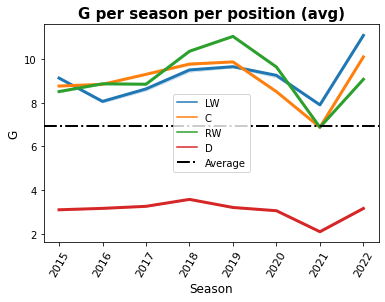

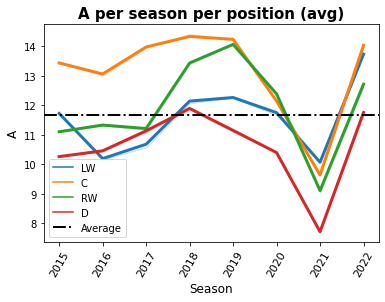

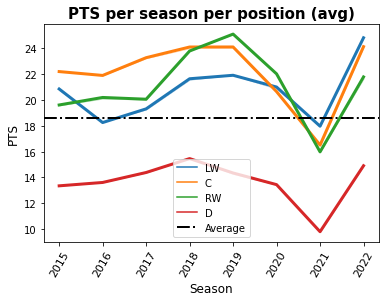

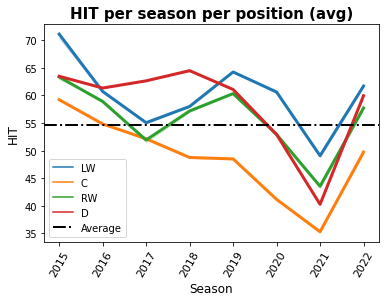

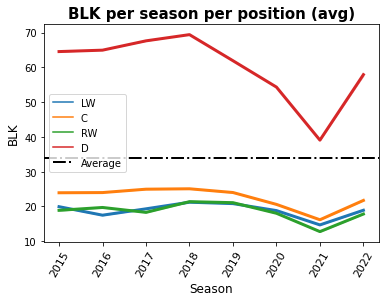

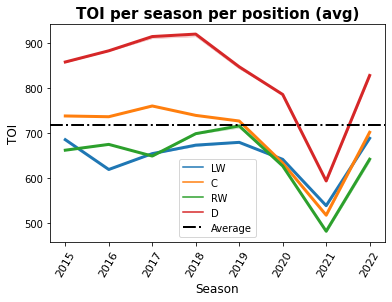

In [77]:
# Displaying Average Goals scored, Hits and Blocked shots per position (LW, RW, C, D) with overall Average across all positions.
for s in cols:
    sns.lineplot(x="Season", y=s, data=data[data["Pos"].isin(["D","C","LW","RW"])], hue="Pos", ci=False, linewidth=3)
    plt.title(s + " per season per position (avg)", fontsize=15, fontweight="bold")
    plt.xlabel("Season", fontsize=12)
    plt.ylabel(s, fontsize=12)
    plt.xticks(rotation=60, fontsize=11)
    plt.axhline(data[s].mean(),0,1,linewidth=2, c="black", linestyle="-.", label="Average")
    plt.legend()
    plt.show()

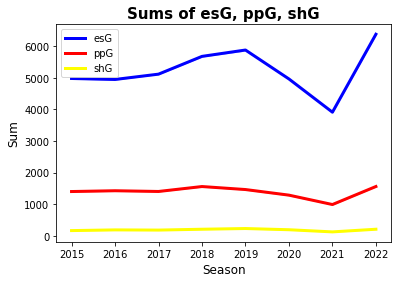

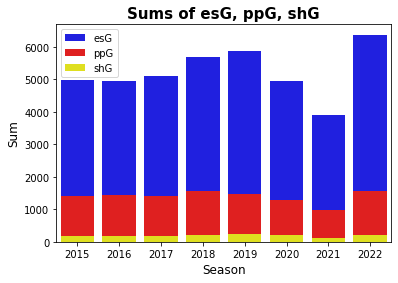

In [78]:
plt.subplot()
sns.lineplot(x="Season", y=data["esG"], data=data, ci=False, estimator=sum, linewidth=3, label="esG", color="blue")
sns.lineplot(x="Season", y=data["ppG"], data=data, ci=False, estimator=sum, linewidth=3, label="ppG", color="red")
sns.lineplot(x="Season", y=data["shG"], data=data, ci=False, estimator=sum, linewidth=3, label="shG", color="yellow")
plt.title("Sums of esG, ppG, shG", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Sum", fontsize=12)
plt.legend()
plt.show()

plt.subplot()
sns.barplot(x="Season", y=data["esG"], data=data, ci=False, estimator=sum, linewidth=3, label="esG", color="blue")
sns.barplot(x="Season", y=data["ppG"], data=data, ci=False, estimator=sum, linewidth=3, label="ppG", color="red")
sns.barplot(x="Season", y=data["shG"], data=data, ci=False, estimator=sum, linewidth=3, label="shG", color="yellow")
plt.title("Sums of esG, ppG, shG", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Sum", fontsize=12)
plt.legend()
plt.show()

In [79]:
# Teams with the most total points scored by their players during the last 7 seasons, sorted in descending order. Tampa Bay Lightning is first with 5452 points.
data.groupby("Team_ID")["PTS"].sum().sort_values(ascending=False).reset_index()

,Team_ID,PTS
0,TBL,5452
1,PIT,5306
2,WSH,5299
3,TOR,5214
4,FLA,5115
5,STL,5052
6,CGY,5030
7,WPG,5008
8,MIN,4994
9,COL,4979


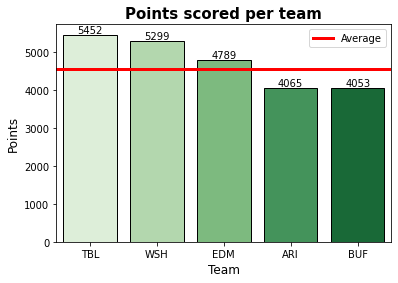

In [80]:
# Points scored per team in a barplot with 2 most best teams, 2 worst teams and 1 team that was in the middle of our list. (2 expansion teams excluded.)
ax = sns.barplot(x="Team_ID", y="PTS", data=data[data["Team_ID"].isin(["TBL", "WSH", "EDM","ARI","BUF"])], estimator=sum, palette="Greens", ci=False, order=["TBL", "WSH", "EDM","ARI","BUF"], ec="black")
plt.title("Points scored per team", fontsize=15, fontweight="bold")
plt.xlabel("Team", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.axhline(data["PTS"].sum()/(len(data["Team_ID"].unique())), linewidth=3, c="r", label="Average")
for i in ax.containers:
    ax.bar_label(i)
plt.legend()
plt.show()

In [81]:
# I want to know which players contributed the most to total points scored by Tampa Bay Lightning, Nikita Kucherov led them with 598 points.
data[data["Team_ID"] == "TBL"].groupby("Player_Name").agg({"PTS":"sum"}).sort_values(by="PTS", ascending=False).reset_index().head(5)

,Player_Name,PTS
0,Nikita Kucherov,598
1,Steven Stamkos,546
2,Victor Hedman,459
3,Brayden Point,368
4,Ondrej Palat,360


In [82]:
# Which players scored the most points during 1 season? Again, Nikita Kucherov is on the first place with 122 points in season 2019. Steven Stamkos scored the most goals, 42.
tbltop5seasons = data[["Player_Name", "Team_ID", "Pos", "G", "A", "PTS", "Avg_TOI", "Season"]][data["Team_ID"] == "TBL"].sort_values(by="PTS", ascending=False).reset_index().head(20)
tbltop5seasons

,index,Player_Name,Team_ID,Pos,G,A,PTS,Avg_TOI,Season
0,4676,Nikita Kucherov,TBL,RW,41,87,128,19:58,2019
1,8272,Steven Stamkos,TBL,C,42,64,106,18:29,2022
2,3615,Nikita Kucherov,TBL,RW,39,61,100,19:49,2018
3,5079,Steven Stamkos,TBL,C,45,53,98,18:18,2019
4,4932,Brayden Point,TBL,C,41,51,92,18:55,2019
5,4008,Steven Stamkos,TBL,C,27,59,86,18:46,2018
6,2579,Nikita Kucherov,TBL,RW,40,45,85,19:26,2017
7,7702,Victor Hedman,TBL,D,20,65,85,25:05,2022
8,5735,Nikita Kucherov,TBL,RW,33,52,85,18:52,2020
9,2463,Victor Hedman,TBL,D,16,56,72,24:30,2017


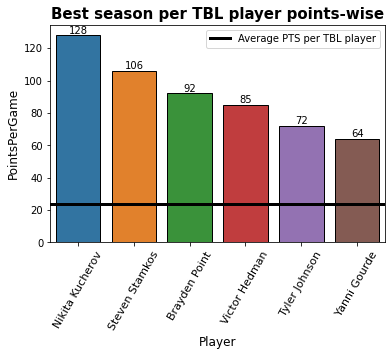

In [83]:
# 5 best players of the last 7 seasons in TBL uniform and their respecitve best seasons points-wise.
ax = sns.barplot(x="Player_Name",y="PTS",data=tbltop5seasons, estimator=max, ci=False, ec="black")
plt.title("Best season per TBL player points-wise", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.xticks(rotation=60, fontsize=11)
plt.axhline(data["PTS"][data["Team_ID"] == "TBL"].mean(),0,1,linewidth=3, c="black", label="Average PTS per TBL player")
for i in ax.containers:
    ax.bar_label(i)
plt.legend()
plt.show()

In [84]:
# Listing top 10 forwards in the last 7 seasons based on their Points total and calculating their Points per game.
ptsoverall = data[data["Pos"].isin(["LW","RW","C","W","F"])].groupby(["Player_Name"]).agg({"GP":"sum","G":"sum","A":"sum","PTS":"sum"}).sort_values(by="PTS", ascending=False).head(10).reset_index()
ptsoverall["PointsPerGame"] = (ptsoverall["PTS"])/(ptsoverall["GP"])
ptsoverall

,Player_Name,GP,G,A,PTS,PointsPerGame
0,Connor McDavid,487.0,239,458,697,1.431211
1,Patrick Kane,592.0,252,435,687,1.160473
2,Sidney Crosby,558.0,243,397,640,1.146953
3,Leon Draisaitl,558.0,254,362,616,1.103943
4,Brad Marchand,574.0,259,350,609,1.060976
5,Johnny Gaudreau,601.0,209,399,608,1.011647
6,Nikita Kucherov,510.0,237,361,598,1.172549
7,Alex Ovechkin,595.0,358,238,596,1.001681
8,Nathan MacKinnon,556.0,218,367,585,1.052158
9,John Tavares,599.0,255,325,580,0.968280


In [85]:
# Listing top 10 defensemen in the last 7 seasons based on their Points total and calculating their Points per game.
ptsdmen = data[data["Pos"] == "D"].groupby(["Player_Name"]).agg({"GP":"sum","G":"sum","A":"sum","PTS":"sum"}).sort_values(by="PTS", ascending=False).head(10).reset_index()
ptsdmen["PointsPerGame"] = (ptsdmen["PTS"])/(ptsdmen["GP"])
ptsdmen

,Player_Name,GP,G,A,PTS,PointsPerGame
0,Brent Burns,618.0,130,359,489,0.791262
1,Roman Josi,588.0,117,351,468,0.795918
2,Victor Hedman,565.0,105,354,459,0.812389
3,John Carlson,571.0,99,360,459,0.803853
4,Erik Karlsson,523.0,90,333,423,0.808795
5,Kris Letang,519.0,89,330,419,0.807322
6,Tyson Barrie,577.0,80,304,384,0.665511
7,John Klingberg,552.0,71,303,374,0.677536
8,Torey Krug,556.0,64,306,370,0.665468
9,Keith Yandle,614.0,42,307,349,0.568404


In [86]:
# Concatenate both datasets into one.
ptsall = pd.concat([ptsoverall,ptsdmen],ignore_index=True)
ptsall.sort_values(by="PTS", ascending=False)


,Player_Name,GP,G,A,PTS,PointsPerGame
0,Connor McDavid,487.0,239,458,697,1.431211
1,Patrick Kane,592.0,252,435,687,1.160473
2,Sidney Crosby,558.0,243,397,640,1.146953
3,Leon Draisaitl,558.0,254,362,616,1.103943
4,Brad Marchand,574.0,259,350,609,1.060976
5,Johnny Gaudreau,601.0,209,399,608,1.011647
6,Nikita Kucherov,510.0,237,361,598,1.172549
7,Alex Ovechkin,595.0,358,238,596,1.001681
8,Nathan MacKinnon,556.0,218,367,585,1.052158
9,John Tavares,599.0,255,325,580,0.968280


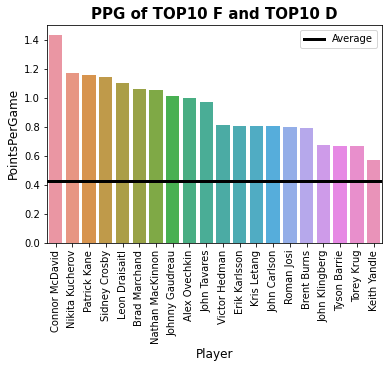

In [87]:
sns.barplot(x="Player_Name",y="PointsPerGame",data=ptsall.sort_values(by="PointsPerGame", ascending=False))
plt.title("PPG of TOP10 F and TOP10 D", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.axhline((data["PTS"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="Average")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [88]:
# Listing top 10 players in the last 7 seasons with the most Hits total, sorted by HIT sum and calculating their Hits per game.
hits = data.groupby(["Player_Name"]).agg({"GP":"sum","HIT":"sum"}).sort_values(by="HIT", ascending=False).head(10).reset_index()
hits["HitsPerGame"] = hits["HIT"]/hits["GP"]
hitsuni = hits["Player_Name"].unique()
hits

,Player_Name,GP,HIT,HitsPerGame
0,Matt Martin,537.0,2127.0,3.960894
1,Ryan Reaves,561.0,1998.0,3.561497
2,Radko Gudas,515.0,1893.0,3.675728
3,Cal Clutterbuck,514.0,1835.0,3.570039
4,Milan Lucic,611.0,1764.0,2.887070
5,Mark Borowiecki,433.0,1755.0,4.053118
6,Tom Wilson,565.0,1745.0,3.088496
7,Marcus Foligno,543.0,1588.0,2.924494
8,Adam Lowry,539.0,1535.0,2.847866
9,Rasmus Ristolainen,574.0,1519.0,2.646341


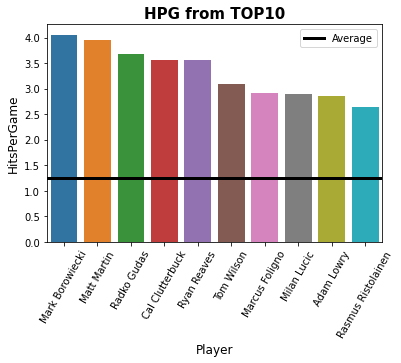

In [89]:
sns.barplot(x="Player_Name",y="HitsPerGame",data=hits.sort_values(by="HitsPerGame", ascending=False))
plt.title("HPG from TOP10", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("HitsPerGame", fontsize=12)
plt.axhline((data["HIT"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="Average")
plt.xticks(rotation=60)
plt.legend()
plt.show()

<Figure size 864x720 with 0 Axes>

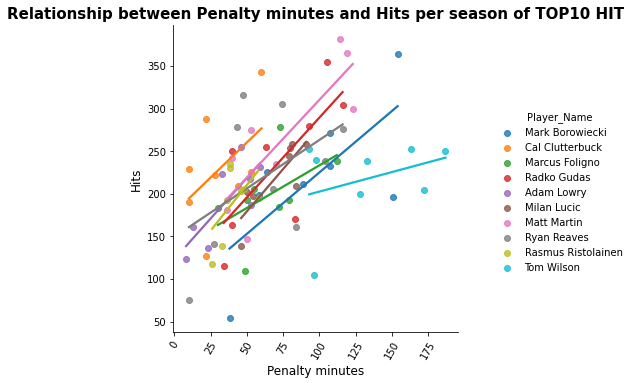

In [90]:
plt.figure(figsize=(12,10))
ax = sns.lmplot(x="PIM",y="HIT", data=data[data["Player_Name"].isin(hitsuni)], hue="Player_Name", ci=False)
plt.title("Relationship between Penalty minutes and Hits per season of TOP10 HIT", fontsize=15, fontweight="bold")
plt.xlabel("Penalty minutes", fontsize=12)
plt.ylabel("Hits", fontsize=12)
plt.xticks(rotation=60)
plt.show()


In [91]:
# Listing top 10 players in the last 7 seasons with the most Blocks total, sorted by BLK sum and calculating their Blocks per game.
blks = data.groupby(["Player_Name"]).agg({"GP":"sum","BLK":"sum"}).sort_values(by="BLK", ascending=False).head(10).reset_index()
blks["BlocksPerGame"] = hits["HIT"]/hits["GP"]
blks

,Player_Name,GP,BLK,BlocksPerGame
0,Kris Russell,480.0,1358.0,3.960894
1,Andy Greene,580.0,1227.0,3.561497
2,Mark Giordano,575.0,1207.0,3.675728
3,Alec Martinez,483.0,1160.0,3.570039
4,Alex Goligoski,597.0,1105.0,2.887070
5,Roman Josi,588.0,1101.0,4.053118
6,Ryan McDonagh,537.0,1095.0,3.088496
7,Alex Pietrangelo,574.0,1091.0,2.924494
8,Alexander Edler,472.0,1089.0,2.847866
9,Jacob Trouba,532.0,1075.0,2.646341


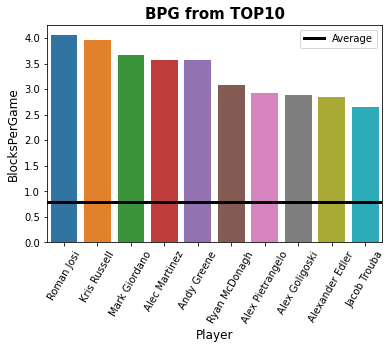

In [92]:
sns.barplot(x="Player_Name",y="BlocksPerGame",data=blks.sort_values(by="BlocksPerGame", ascending=False))
plt.title("BPG from TOP10", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("BlocksPerGame", fontsize=12)
plt.axhline((data["BLK"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="Average")
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [93]:
# Listing top 10 Centers in the last 7 seasons with the most Faceoffs won, sorted by FOW sum and calculating their FOW%.
fow10 = data[data["Pos"] == "C"].groupby(["Player_Name"]).agg({"GP":"sum","FOW":"sum","FOL":"sum"}).sort_values(by="FOW", ascending=False).head(10).reset_index()
fow10["FOW%"] = fow10["FOW"]/((fow10["FOW"])+(fow10["FOL"]))*100
fow10

,Player_Name,GP,FOW,FOL,FOW%
0,Ryan O'Reilly,593.0,7618.0,5689.0,57.248065
1,Patrice Bergeron,557.0,7424.0,5116.0,59.202552
2,Anze Kopitar,606.0,6859.0,5726.0,54.501391
3,Sidney Crosby,558.0,6593.0,6009.0,52.317093
4,Jonathan Toews,530.0,6323.0,4740.0,57.154479
5,Bo Horvat,572.0,6086.0,5275.0,53.569228
6,John Tavares,599.0,5965.0,5038.0,54.212488
7,Ryan Johansen,598.0,5561.0,4883.0,53.245883
8,Aleksander Barkov,542.0,5385.0,4913.0,52.291707
9,Jordan Staal,531.0,5384.0,4074.0,56.925354


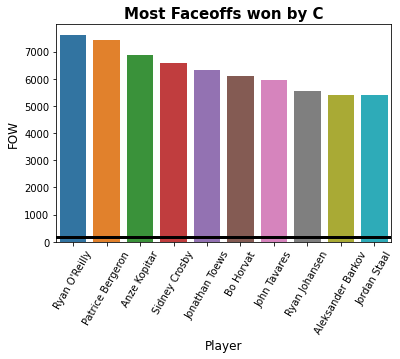

In [94]:
sns.barplot(x="Player_Name",y="FOW",data=fow10.sort_values(by="FOW", ascending=False))
plt.title("Most Faceoffs won by C", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("FOW", fontsize=12)
plt.xticks(rotation=60)
plt.axhline(data["FOW"][data["Pos"] == "C"].mean(),0,1, color="black", linewidth=3)
plt.show()

In [95]:
print("Ovi shots in 2022: ",data["S"][(data["Player_Name"] == "Alex Ovechkin") & (data["Season"] == 2022)].sum(), "\n")
print("WSH team total shots in 2022: ",data["S"][(data["Team_ID"] == "WSH") & (data["Season"] == 2022)].sum(), "\n")
print("Percentage of Ovi' shots compared to team total in 2022: ",(data["S"][(data["Player_Name"] == "Alex Ovechkin") & (data["Season"] == 2022)])/(data["S"][(data["Team_ID"] == "WSH") & (data["Season"] == 2022)].sum())*100)
# Ovi had almost 13% of all WSH shots in 2022.

Ovi shots in 2022:  334.0 

WSH team total shots in 2022:  2577.0 

Percentage of Ovi' shots compared to team total in 2022:  8060    12.960807
Name: S, dtype: float64


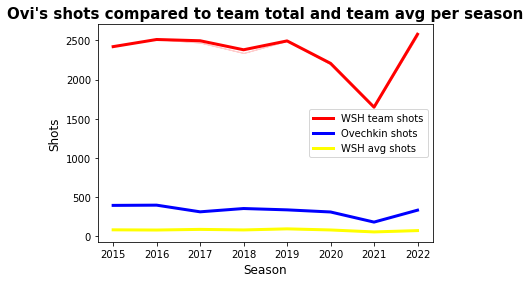

In [96]:
sns.lineplot(x="Season", y=data["S"][data["Team_ID"] == "WSH"], data=data, ci=False, estimator=sum, linewidth=3, label="WSH team shots", color="red")
sns.lineplot(x="Season", y=data["S"][data["Player_Name"] == "Alex Ovechkin"], data=data, ci=False, estimator=sum, linewidth=3, label="Ovechkin shots", color="blue")
sns.lineplot(x="Season", y=data["S"][data["Team_ID"] == "WSH"], data=data, ci=False, linewidth=3, label="WSH avg shots", color="yellow")
plt.title("Ovi's shots compared to team total and team avg per season", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Shots", fontsize=12)
plt.legend()
plt.show()

In [97]:
# Creating a new Shooting percentage column.
data["S_Pct"] = (data["G"]/data["S"])*100
data["S_Pct"].dtype
print("Average shooting percentage of all players is : ",data["S_Pct"].mean())
print("Average shooting percentage of all defensemen is : ",data["S_Pct"][data["Pos"] == "D"].mean())
print("Average shooting percentage of all forwards is : ",data["S_Pct"][data["Pos"] != "D"].mean())

Average shooting percentage of all players is :  7.761628542306192
Average shooting percentage of all defensemen is :  4.158558580759679
Average shooting percentage of all forwards is :  9.651857790620008


In [98]:
# Displaying 10 forwards with the highest shooting percentage, while having more than 100 shots in the season 2022
bestsc = data[["Player_Name","Season","S","S_Pct","G"]][(data["S"] > 100) & (data["Season"] == 2022)].sort_values(by="S_Pct", ascending=False).head(10)
bestsc

,Player_Name,Season,S,S_Pct,G
7303,Ivan Barbashev,2022,111.0,23.423423,26
7756,Ryan Johansen,2022,118.0,22.033898,26
8029,Brock Nelson,2022,171.0,21.637427,37
8208,Brayden Schenn,2022,111.0,21.621622,24
8039,Joshua Norris,2022,172.0,20.348837,35
7833,Chris Kreider,2022,258.0,20.155039,52
7867,Gabriel Landeskog,2022,150.0,20.000000,30
7531,Leon Draisaitl,2022,278.0,19.784173,55
7748,Tanner Jeannot,2022,124.0,19.354839,24
8319,Troy Terry,2022,192.0,19.270833,37


In [99]:
# Displaying their career averages for comparison.
bestscuni = bestsc["Player_Name"].unique()
for w in bestscuni:
    print(w)
    wavg = data["S_Pct"][data["Player_Name"] == w].mean()
    print(wavg)

Ivan Barbashev
18.934480992620525
Ryan Johansen
11.699207886638625
Brock Nelson
14.59943233030105
Brayden Schenn
14.764019981303715
Joshua Norris
12.685723514211887
Chris Kreider
15.096030875636027
Gabriel Landeskog
13.53397835153154
Leon Draisaitl
15.965094486834229
Tanner Jeannot
20.546984572230016
Troy Terry
10.179042584871947


In [100]:
# Displaying 10 forwards with the lowest shooting percentage while having more than 200 shots in the 2022 season.
worstsc = data[["Player_Name","Season","S","S_Pct","G"]][(data["S"] > 200) & (data["Season"] == 2022) & (data["Pos"].isin(["LW","RW","C","W","F"]))].sort_values(by="S_Pct", ascending=True).head(10)
worstsc

,Player_Name,Season,S,S_Pct,G
7294,Mikael Backlund,2022,214.0,5.607477,12
7824,Travis Konecny,2022,220.0,7.272727,16
7462,Blake Coleman,2022,212.0,7.547170,16
8173,Evan Rodrigues,2022,243.0,7.818930,19
7737,Alex Iafallo,2022,215.0,7.906977,17
8006,Trevor Moore,2022,202.0,8.415842,17
7340,Patrice Bergeron,2022,293.0,8.532423,25
7282,Viktor Arvidsson,2022,227.0,8.810573,20
7825,Anze Kopitar,2022,210.0,9.047619,19
7790,Patrick Kane,2022,287.0,9.059233,26


In [101]:
# Displaying their career averages for comparison.
worstscuni = worstsc["Player_Name"].unique()
for w in worstscuni:
    print(w)
    wavg = data["S_Pct"][data["Player_Name"] == w].mean()
    print(wavg)

Mikael Backlund
9.157394450382466
Travis Konecny
11.718469296818794
Blake Coleman
7.606009304944359
Evan Rodrigues
8.61051971320558
Alex Iafallo
9.601527240765112
Trevor Moore
10.115666499008942
Patrice Bergeron
11.696694373778158
Viktor Arvidsson
9.347240336179155
Anze Kopitar
12.660910018881811
Patrick Kane
11.68467322762161


In [102]:
data["S_PctTeamAvg"] = "Below"
for i in  data["Team_ID"].unique():
    teamspct = data["S_Pct"][data["Team_ID"] == i].mean()
    data["S_PctTeamAvg"][(data["Team_ID"] == i) & (data["S_Pct"] > teamspct)] = "Above"


C:\Users\krist\AppData\Local\Temp\ipykernel_9440\2672330454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["S_PctTeamAvg"][(data["Team_ID"] == i) & (data["S_Pct"] > teamspct)] = "Above"
C:\Users\krist\AppData\Local\Temp\ipykernel_9440\2672330454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["S_PctTeamAvg"][(data["Team_ID"] == i) & (data["S_Pct"] > teamspct)] = "Above"
C:\Users\krist\AppData\Local\Temp\ipykernel_9440\2672330454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [103]:
data["S_PctTeamAvg"].value_counts()

Below    4375
Above    3482
Name: S_PctTeamAvg, dtype: int64

In [104]:
print(data["S_Pct"][data["Team_ID"] == "COL"].mean())
print(data["S_PctTeamAvg"][data["Team_ID"] == "COL"].value_counts())
data[["Player_Name","Team_ID","S_Pct", "S_PctTeamAvg"]][(data["Team_ID"] == "COL") & (data["S_Pct"] > 7.859518109036625)]

7.859518109036625
Below    152
Above    109
Name: S_PctTeamAvg, dtype: int64


,Player_Name,Team_ID,S_Pct,S_PctTeamAvg
40,Tyson Barrie,COL,8.633094,Above
113,Daniel Briere,COL,11.594203,Above
250,Matt Duchene,COL,10.144928,Above
402,Freddie Hamilton,COL,9.090909,Above
452,Jarome Iginla,COL,15.343915,Above
...,...,...,...,...
8031,Alex Newhook,COL,11.504425,Above
8032,Valeri Nichushkin,COL,13.888889,Above
8138,Mikko Rantanen,COL,14.173228,Above
8233,Kiefer Sherwood,COL,11.111111,Above


In [105]:
# I want to look more closely on some of the best defensemen that played in this time span. Namely Kris Letang, John Carlson and Roman Josi.
dmen = data[data["Player_Name"].isin(["Kris Letang", "John Carlson", "Roman Josi"])].groupby(["Player_Name"]).agg({"G":["min","max","mean"],"A":["min","max","mean"],"PTS":["min","max","mean"], "GP":"mean"}).reset_index()
dmenunique = dmen["Player_Name"].unique()
dmen.columns = dmen.columns.map("_".join)
dmen

,Player_Name_,G_min,G_max,G_mean,A_min,A_max,A_mean,PTS_min,PTS_max,PTS_mean,GP_mean
0,John Carlson,8,17,12.375,28,60,45.000,37,75,57.375,71.375
1,Kris Letang,5,16,11.125,29,58,41.250,34,68,52.375,64.875
2,Roman Josi,8,23,14.625,25,73,43.875,33,96,58.500,73.500


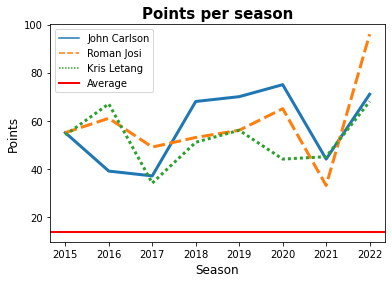

In [106]:
# Points per season of the 3 defensemen from the previous table in a linegraph. Roman Josi and Kris Letang had their career years in the last season.
sns.lineplot(x="Season", y="PTS", hue="Player_Name", data=data[data["Player_Name"].isin(dmenunique)], style="Player_Name", linewidth=3)
plt.title("Points per season", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.axhline(data["PTS"][data["Pos"] == "D"].mean(),0,1,linewidth=2, c="r", label="Average")
plt.legend(fontsize=10)
plt.show()


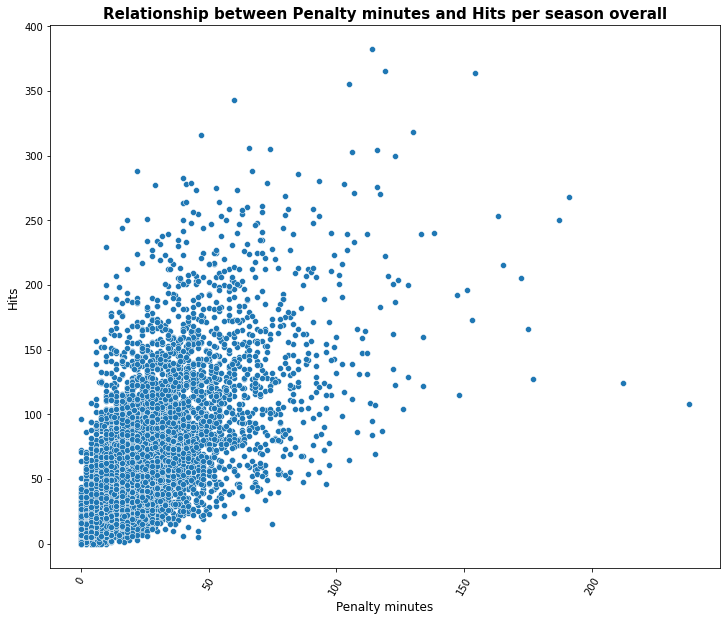

In [107]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="PIM",y="HIT", data=data)
plt.title("Relationship between Penalty minutes and Hits per season overall", fontsize=15, fontweight="bold")
plt.xlabel("Penalty minutes", fontsize=12)
plt.ylabel("Hits", fontsize=12)
plt.xticks(rotation=60)
plt.show()


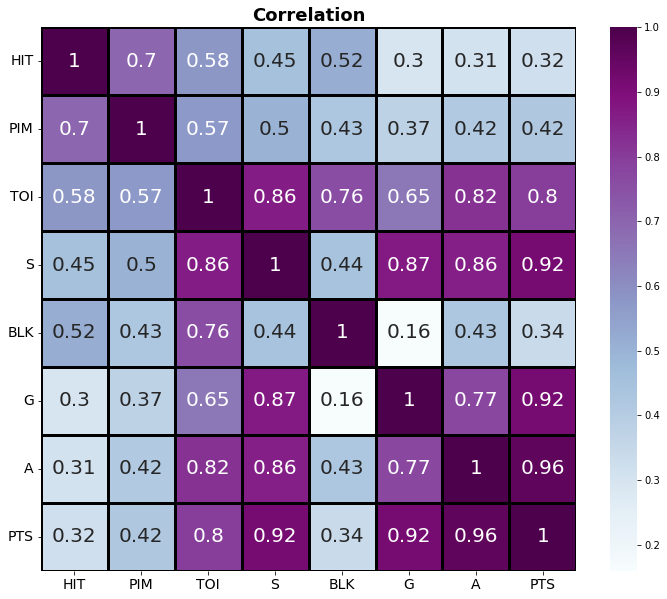

In [108]:
cori = data[["HIT","PIM","TOI","S","BLK", "G", "A", "PTS"]].corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(cori, annot=True, annot_kws={"size":20}, cmap="BuPu", linewidths=3, linecolor="black")
plt.title("Correlation", fontsize=18, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.show()

In [109]:
penguins = data[["Player_Name", "Team_ID", "GP", "G", "A", "PTS", "xGF", "xGA", "TOI"]][(data["Team_ID"] == "PIT") & (data["Season"] == 2022)].sort_values(by="xGF", ascending=False)
penguins["G60"] = (penguins["G"]/penguins["TOI"])*60
penguins["A60"] = (penguins["A"]/penguins["TOI"])*60
penguins["PTS60"] = (penguins["PTS"]/penguins["TOI"])*60
penguins["xGF60"] = (penguins["xGF"]/penguins["TOI"])*60
penguins["xGA60"] = (penguins["xGA"]/penguins["TOI"])*60
penguins["xGF60%"] = (penguins["xGF60"]/(penguins["xGF60"] + penguins["xGA60"]))
penguins.sort_values(by="PTS", ascending=False)
print("Average xGF60 for PIT is: ", penguins["xGF60"].mean())
print("Average xGA60 for PIT is: ", penguins["xGA60"].mean())
penguins

Average xGF60 for PIT is:  2.3476935797708642
Average xGA60 for PIT is:  2.174927866573842


,Player_Name,Team_ID,GP,G,A,PTS,xGF,xGA,TOI,G60,A60,PTS60,xGF60,xGA60,xGF60%
7892,Kris Letang,PIT,78.0,10,58,68,75.0,72.3,2011.0,0.298359,1.730482,2.028841,2.237693,2.157136,0.509165
7662,Jake Guentzel,PIT,76.0,40,44,84,69.0,58.1,1527.0,1.571709,1.728880,3.300589,2.711198,2.282908,0.542880
7544,Brian Dumoulin,PIT,76.0,3,15,18,65.5,65.4,1658.0,0.108565,0.542823,0.651387,2.370326,2.366707,0.500382
7483,Sidney Crosby,PIT,69.0,31,53,84,63.4,52.3,1378.0,1.349782,2.307692,3.657475,2.760522,2.277213,0.547969
7954,Mike Matheson,PIT,74.0,11,20,31,62.8,56.2,1391.0,0.474479,0.862689,1.337168,2.708843,2.424155,0.527731
7947,John Marino,PIT,81.0,1,24,25,56.2,55.9,1672.0,0.035885,0.861244,0.897129,2.016746,2.005981,0.501338
8173,Evan Rodrigues,PIT,82.0,19,24,43,54.0,42.3,1299.0,0.877598,1.108545,1.986143,2.494226,1.953811,0.560748
8185,Chad Ruhwedel,PIT,78.0,4,9,13,51.1,39.5,1196.0,0.200669,0.451505,0.652174,2.563545,1.981605,0.564018
8097,Marcus Pettersson,PIT,72.0,2,17,19,47.3,37.7,1127.0,0.106477,0.905058,1.011535,2.518190,2.007098,0.556471
7791,Kasperi Kapanen,PIT,79.0,11,21,32,44.7,38.7,1148.0,0.574913,1.097561,1.672474,2.336237,2.022648,0.535971


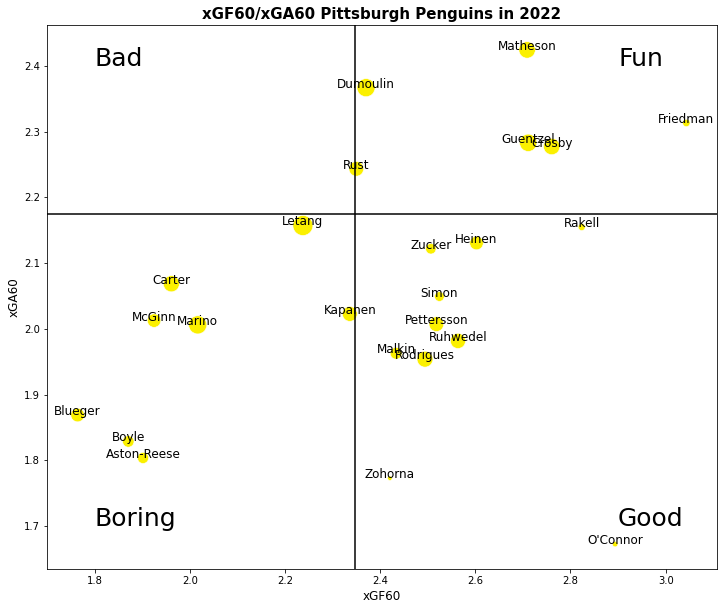

In [110]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="xGF60",y="xGA60",data=penguins[penguins["GP"] > 10], size="TOI", sizes=(20,400), color = "#FBF000")
for i in penguins["Player_Name"][penguins["GP"] > 10].unique():
        plt.text(penguins["xGF60"][(penguins["Player_Name"]== i) & (penguins["GP"] > 10)],penguins["xGA60"][(penguins["Player_Name"]== i) & (penguins["GP"] > 10)],i.split(" ")[-1], fontsize=12, ha="center")
plt.text(1.8, 1.7, "Boring", fontsize=25)
plt.text(2.9, 1.7, "Good", fontsize=25)
plt.text(1.8, 2.4, "Bad", fontsize=25)
plt.text(2.9, 2.4, "Fun", fontsize=25)
plt.axvline(2.3476935797708642, 0,1, color="black")
plt.axhline(2.174927866573842, 0,1, color="black")
plt.title("xGF60/xGA60 Pittsburgh Penguins in 2022", fontsize=15, fontweight="bold")
plt.xlabel("xGF60", fontsize=12)
plt.ylabel("xGA60", fontsize=12)
plt.legend().remove()
plt.show()



In [111]:
pit = pd.read_csv("C:\Kiki\python_tutorial\pittsburgh2022.csv")

In [112]:
pit.shape

(140, 156)

In [113]:
list(pit.columns)

['playerId',
 'season',
 'name',
 'team',
 'position',
 'situation',
 'games_played',
 'height',
 'weight',
 'icetime',
 'shifts',
 'gameScore',
 'onIce_xGoalsPercentage',
 'offIce_xGoalsPercentage',
 'onIce_corsiPercentage',
 'offIce_corsiPercentage',
 'onIce_fenwickPercentage',
 'offIce_fenwickPercentage',
 'iceTimeRank',
 'I_F_xOnGoal',
 'I_F_xGoals',
 'I_F_xRebounds',
 'I_F_xFreeze',
 'I_F_xPlayStopped',
 'I_F_xPlayContinuedInZone',
 'I_F_xPlayContinuedOutsideZone',
 'I_F_flurryAdjustedxGoals',
 'I_F_scoreVenueAdjustedxGoals',
 'I_F_flurryScoreVenueAdjustedxGoals',
 'I_F_primaryAssists',
 'I_F_secondaryAssists',
 'I_F_shotsOnGoal',
 'I_F_missedShots',
 'I_F_blockedShotAttempts',
 'I_F_shotAttempts',
 'I_F_points',
 'I_F_goals',
 'I_F_rebounds',
 'I_F_reboundGoals',
 'I_F_freeze',
 'I_F_playStopped',
 'I_F_playContinuedInZone',
 'I_F_playContinuedOutsideZone',
 'I_F_savedShotsOnGoal',
 'I_F_savedUnblockedShotAttempts',
 'penalties',
 'I_F_penalityMinutes',
 'I_F_faceOffsWon',
 'I_F_

In [114]:
pit = pit[pit["situation"] == "all"]

In [115]:
pit.shape

(28, 156)

In [116]:
pit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 136
Columns: 156 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(64), int64(88), object(4)
memory usage: 34.3+ KB


In [117]:
pit.head()

,playerId,season,name,team,position,situation,games_played,height,weight,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
1,8475722,2021,Jason Zucker,PIT,L,all,41,180,85,36458,739,21.23,0.59,0.53,0.55,0.51,0.56,0.51,278,92.95,9.93,7.21,20.61,3.09,49.80,36.35,9.52,10.11,9.70,5,4,102,25,19,146,17,8,10,3,26,2,31,50,94,119,6,15,4,66,15,22,86,34,7,3.04,4.26,2.63,2,4,2,148.68,127,129.07,11,1.63,2.33,2.20,9.36,9.55,9.30,739,111,58,93,477,112,97,106,424,4,11,113704,15,21,8,20,342.98,32.67,30.84,33.29,31.41,367,104,134,605,32,38,6,339,106,26,11.30,12.55,8.82,12,14,6,615.00,471,478.

In [118]:
pit = pit[['name', 'height',
 'weight','gameScore','I_F_takeaways',
 'I_F_giveaways','penalityMinutesDrawn','I_F_penalityMinutes', 'I_F_xGoals',]]

In [119]:
print(penguins.shape)
print(pit.shape)

(31, 15)
(28, 9)


In [120]:
pit["name"].unique() == penguins["Player_Name"].unique()

C:\Users\krist\AppData\Local\Temp\ipykernel_9440\2829301413.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  pit["name"].unique() == penguins["Player_Name"].unique()


False

In [121]:
print(np.setdiff1d(penguins["Player_Name"], pit["name"]))

['Dominik Simon' 'Sam Lafferty' 'Zach Aston-Reese']


In [122]:
pitmerged = pd.merge(left=penguins, right=pit, how="inner", left_on=["Player_Name"], right_on=["name"])

In [123]:
pitmerged.sort_values(by="PTS", ascending=False, inplace=True)
pitmerged.drop(columns="name", inplace=True)

In [137]:
pitmerged.sort_index(inplace=True)
pitmerged

,Player_Name,Team_ID,GP,G,A,PTS,xGF,xGA,TOI,G60,A60,PTS60,xGF60,xGA60,xGF60%,height,weight,gameScore,I_F_takeaways,I_F_giveaways,penalityMinutesDrawn,I_F_penalityMinutes,I_F_xGoals,GoalsAboveExpected,xG60
0,Kris Letang,PIT,78.0,10,58,68,75.0,72.3,2011.0,0.298359,1.730482,2.028841,2.237693,2.157136,0.509165,183,91,70.85,59,79,27,49,9.69,0.31,0.289110
1,Jake Guentzel,PIT,76.0,40,44,84,69.0,58.1,1527.0,1.571709,1.728880,3.300589,2.711198,2.282908,0.542880,180,82,91.41,41,23,58,44,37.28,2.72,1.464833
2,Brian Dumoulin,PIT,76.0,3,15,18,65.5,65.4,1658.0,0.108565,0.542823,0.651387,2.370326,2.366707,0.500382,193,94,23.42,34,46,14,24,3.90,-0.90,0.141134
3,Sidney Crosby,PIT,69.0,31,53,84,63.4,52.3,1378.0,1.349782,2.307692,3.657475,2.760522,2.277213,0.547969,180,91,86.95,34,54,30,32,26.02,4.98,1.132946
4,Mike Matheson,PIT,74.0,11,20,31,62.8,56.2,1391.0,0.474479,0.862689,1.337168,2.708843,2.424155,0.527731,188,85,46.75,43,43,37,33,7.13,3.87,0.307549
5,John Marino,PIT,81.0,1,24,25,56.2,55.9,1672.0,0.035885,0.861244,0.897129,2.016746,2.005981,0.501338,185,82,32.35,43,35,37,23,4.35,-3.35,0.156100
6,Evan Rodrigues,PIT,82.0,19,24,43,54.0,42.3,1299.0,0.877598,1.108545,1.986143,2.494226,1.953811,0.560748,180,83,65.20,33,32,34,14,22.84,-3.84,1.054965
7,Chad Ruhwedel,PIT,78.0,4,9,13,51.1,39.5,1196.0,0.200669,0.451505,0.652174,2.563545,1.981605,0.564018,180,87,26.20,19,21,22,14,2.90,1.10,0.145485
8,Marcus Pettersson,PIT,72.0,2,17,19,47.3,37.7,1127.0,0.106477,0.905058,1.011535,2.518190,2.007098,0.556471,194,80,28.47,17,14,24,38,3.24,-1.24,0.172493
9,Kasperi Kapanen,PIT,79.0,11,21,32,44.7,38.7,1148.0,0.574913,1.097561,1.672474,2.336237,2.022648,0.535971,185,88,36.30,40,30,18,16,11.13,-0.13,0.581707


In [138]:
pitmerged["GoalsAboveExpected"] = pitmerged["G"] - pitmerged["I_F_xGoals"]
pitmerged["xG60"] = (pitmerged["I_F_xGoals"] / pitmerged["TOI"])*60
pitmerged[["Player_Name", "GP","G", "I_F_xGoals", "GoalsAboveExpected", "G60", "xG60"]].sort_values(by="xG60", ascending=False)


,Player_Name,GP,G,I_F_xGoals,GoalsAboveExpected,G60,xG60
1,Jake Guentzel,76.0,40,37.28,2.72,1.571709,1.464833
10,Bryan Rust,60.0,24,25.45,-1.45,1.278863,1.356128
14,Evgeni Malkin,41.0,20,14.65,5.35,1.595745,1.168883
3,Sidney Crosby,69.0,31,26.02,4.98,1.349782,1.132946
6,Evan Rodrigues,82.0,19,22.84,-3.84,0.877598,1.054965
12,Danton Heinen,76.0,18,16.93,1.07,1.118012,1.051553
26,Valtteri Puustinen,1.0,0,0.17,-0.17,0.000000,1.020000
24,Kasper Bjorkqvist,6.0,1,0.84,0.16,1.200000,1.008000
11,Jeff Carter,76.0,19,22.52,-3.52,0.848846,1.006106
20,Drew O'Connor,22.0,3,3.77,-0.77,0.796460,1.000885


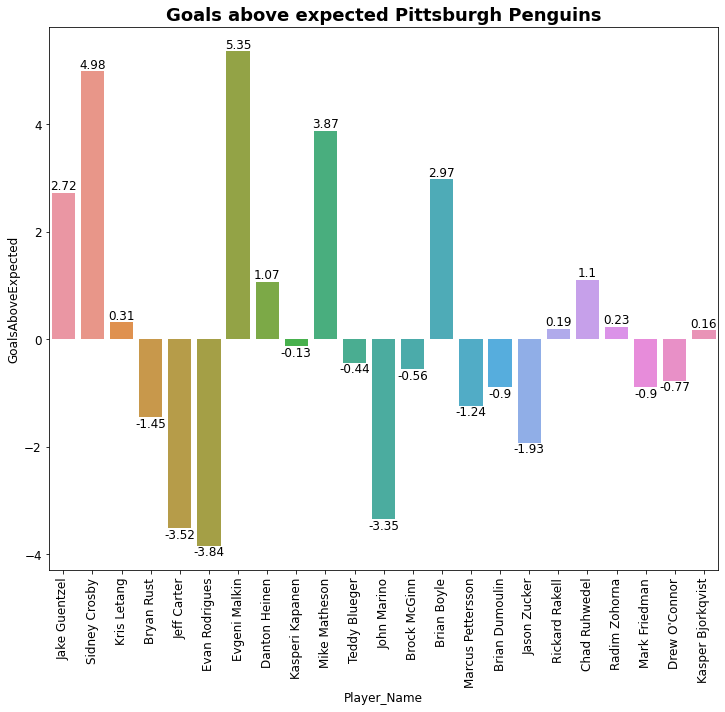

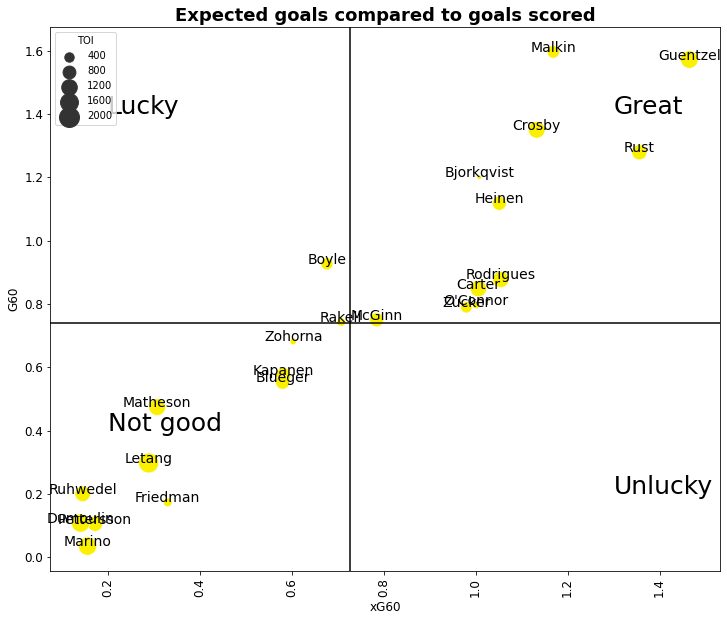

In [127]:
plt.figure(figsize=(12,10))
plt.subplot()
aux = sns.barplot(x="Player_Name",y="GoalsAboveExpected",data=pitmerged[pitmerged["GP"] > 5])
plt.title("Goals above expected Pittsburgh Penguins", fontsize=18, fontweight="bold")
plt.xlabel("Player_Name", fontsize=12)
for i in aux.containers:
    aux.bar_label(i, fontsize=12)
plt.ylabel("GoalsAboveExpected", fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.show()

plt.figure(figsize=(12,10))
plt.subplot()
sns.scatterplot(x="xG60",y="G60",data=pitmerged[pitmerged["GP"] > 5], size="TOI", sizes=(20,400), color = "#FBF000")
for i in pitmerged["Player_Name"][pitmerged["GP"] > 5].unique():
    plt.text(pitmerged["xG60"][(pitmerged["Player_Name"] == i) & (pitmerged["GP"] > 5)], pitmerged["G60"][(pitmerged["Player_Name"] == i) & (pitmerged["GP"] > 5)], i.split(" ")[-1], fontsize=14, ha="center")

plt.text(0.2, 0.4, "Not good", fontsize=25)
plt.text(1.3, 0.2, "Unlucky", fontsize=25)
plt.text(0.2, 1.4, "Lucky", fontsize=25)
plt.text(1.3, 1.4, "Great", fontsize=25)
plt.title("Expected goals compared to goals scored", fontsize=18, fontweight="bold")
plt.xlabel("xG60", fontsize=12)
plt.ylabel("G60", fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.axvline(pitmerged["xG60"][pitmerged["GP"] > 5].mean(), color="black")
plt.axhline(pitmerged["G60"][pitmerged["GP"] > 5].mean(), color="black")
plt.show()

In [129]:
pit.corr()

,height,weight,gameScore,I_F_takeaways,I_F_giveaways,penalityMinutesDrawn,I_F_penalityMinutes,I_F_xGoals
height,1.000000,0.626072,-0.300370,-0.092523,-0.143678,-0.259058,0.019258,-0.315261
weight,0.626072,1.000000,-0.104355,-0.077127,-0.006408,-0.221756,0.023896,-0.092163
gameScore,-0.300370,-0.104355,1.000000,0.798721,0.776210,0.791466,0.721459,0.841687
I_F_takeaways,-0.092523,-0.077127,0.798721,1.000000,0.887806,0.728852,0.736198,0.565513
I_F_giveaways,-0.143678,-0.006408,0.776210,0.887806,1.000000,0.578232,0.711283,0.497097
penalityMinutesDrawn,-0.259058,-0.221756,0.791466,0.728852,0.578232,1.000000,0.802128,0.687944
I_F_penalityMinutes,0.019258,0.023896,0.721459,0.736198,0.711283,0.802128,1.000000,0.540777
I_F_xGoals,-0.315261,-0.092163,0.841687,0.565513,0.497097,0.687944,0.540777,1.000000
